In [88]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Hopfield_Net():
    """
        - X is the input matrix where each column is a sample
        - W is a matrix of the weights.
        
    """
    def __init__(self, X):
        self.X = X
        self.D = X.shape[0] # Number of units
        self.N = X.shape[1] # Number of patterns
        self.Wrand = np.random.normal(0,1,(self.D,self.D))
        self.W = self.init_W()
        self.max_iter = 2100
        self.iters = 0
        self.pattern_dict = self.init_dict()
        self.attractor_dict = self.pattern_dict.copy()
        self.update_type = 'syn'
        self.store_updates = []
    
    def init_W(self):
        W = np.zeros([self.D, self.D])
        for p in range(self.N):
            x = self.X[:,p]
            for i in range(self.D):
                for j in range(self.D):
                    W[i,j] += x[i]*x[j]
        W = W - np.diag(np.diag(W))
        return W
    
    def init_dict(self): # Dict of patterns as row vectors
        pattern_dict = {}
        for p in range(self.N):
            pattern = self.X[:,p].reshape(1, self.D)
            pattern_dict[p] = pattern
        return pattern_dict
    
    def update_rule(self, x): # x is a row vector
        #print("Before update {}".format(self.iters), x)
        for i in range(self.D):
            sum_term = 0
            for j in range(self.D):
                sum_term += self.W[i,j]*x[0,j]
            x[0,i] = np.sign(sum_term)
        #print("After update {}".format(self.iters), x)
        return x
    
    def random_update_rule(self, x):
        #print("Before update {}".format(self.iters), x)
        i = random.choice(list(range(self.D)))
        sum_term = 0
        for j in range(self.D):
            sum_term += self.W[i,j]*x[0,j]
        x[0,i] = np.sign(sum_term)
        #print("After update {}".format(self.iters), x)
        return x
    
    def update_W(self, x): # x is a row vector
        for i in range(self.D):
            for j in range(self.D):
                self.W[i,j] += x.T[i]*x.T[j]
        self.W = self.W - np.diag(np.diag(self.W))
        self.N += 1
        self.pattern_dict[self.N-1] = x.reshape(1, self.D)
        return self.W
    
    def add_attractor(self, x):
        self.attractor_dict[len(self.attractor_dict.keys())] = x.reshape(1, self.D)
    
    def energy(self, x):
        E = 0
        for i in range(self.D):
            for j in range(self.D):
                E += self.W[i,j]*x[0,i]*x[0,j]
        return -E

    def net_out(self, x): # x is a row vector
        #self.W = self.update_W(x)
        #if np.array_equal(x, y):
        #y = np.sign(np.dot(self.W, x.T))
        if self.update_type == 'syn':
            y = self.update_rule(np.copy(x))
            #self.store_updates.append(x)
        else:
            if self.iters % 700 == 0:
                self.store_updates.append(x)
            y = self.random_update_rule(np.copy(x))
        in_pattern_dict = [(y == pattern).all() 
                      for pattern in self.pattern_dict.values()]
        if any(in_pattern_dict):
            fixed_point = np.nonzero(in_pattern_dict)[0][0]
            print("Converged to X-row {} after {} iterations".format(fixed_point+1, self.iters+1))
            self.iters = 0
            return y
        elif np.array_equal(x, y) and self.update_type == 'syn':
            print("Stable after {}. Did not change after last iteration.".format(self.iters+1))
            in_attractor_dict = [(y == attractor).all() 
                      for attractor in self.attractor_dict.values()]
            if not any(in_attractor_dict):
                self.add_attractor(y)
            self.iters = 0
            return y
        elif self.iters <= self.max_iter:
            self.iters += 1
            if self.update_type == 'syn':
                return self.update_rule(self.net_out(np.copy(y)))
            else:
                return self.random_update_rule(self.net_out(np.copy(y)))
        else:
            print("Reached maximum number of iterations.")
            self.iters = 0
            return y
    
    #def number_of_atractors:
        
    
    #def train(self):
    #    for idx in range(self.N):
    #        x = X[:,idx].reshape([self.D, 1])
    #        y = net_out(x)


# 3.1 Convergence and attractors

In [89]:
x1 = np.array([[-1, -1, 1, -1, 1, -1, -1, 1]])
x2 = np.array([[-1, -1, -1, -1, -1, 1, -1, -1]])
x3 = np.array([[-1, 1, 1, -1, -1, 1, -1, 1]])

x4 = np.array([[-1, -1, 1, -1, -1, 1, -1, 1]])

In [90]:
X = np.concatenate((x1.T, x2.T, x3.T), axis = 1)

In [91]:
X.shape

(8, 3)

In [92]:
hop_net_1 = Hopfield_Net(x1.T)
hop_net_2 = Hopfield_Net(x2.T)
hop_net_3 = Hopfield_Net(x3.T)

In [93]:
hop_net_1.W + hop_net_2.W + hop_net_3.W

array([[ 0.,  1., -1.,  3.,  1., -1.,  3., -1.],
       [ 1.,  0.,  1.,  1., -1.,  1.,  1.,  1.],
       [-1.,  1.,  0., -1.,  1., -1., -1.,  3.],
       [ 3.,  1., -1.,  0.,  1., -1.,  3., -1.],
       [ 1., -1.,  1.,  1.,  0., -3.,  1.,  1.],
       [-1.,  1., -1., -1., -3.,  0., -1., -1.],
       [ 3.,  1., -1.,  3.,  1., -1.,  0., -1.],
       [-1.,  1.,  3., -1.,  1., -1., -1.,  0.]])

In [94]:
hop_net = Hopfield_Net(X)

In [95]:
hop_net.W

array([[ 0.,  1., -1.,  3.,  1., -1.,  3., -1.],
       [ 1.,  0.,  1.,  1., -1.,  1.,  1.,  1.],
       [-1.,  1.,  0., -1.,  1., -1., -1.,  3.],
       [ 3.,  1., -1.,  0.,  1., -1.,  3., -1.],
       [ 1., -1.,  1.,  1.,  0., -3.,  1.,  1.],
       [-1.,  1., -1., -1., -3.,  0., -1., -1.],
       [ 3.,  1., -1.,  3.,  1., -1.,  0., -1.],
       [-1.,  1.,  3., -1.,  1., -1., -1.,  0.]])

In [96]:
hop_net.net_out(np.copy(x3))

Converged to X-row 3 after 1 iterations


array([[-1,  1,  1, -1, -1,  1, -1,  1]])

In [97]:
x1d = np.array([[1, -1, 1, -1, 1, -1, -1, 1]])
x2d = np.array([[1, 1, -1, -1, -1, 1, -1, -1]])
x3d = np.array([[1, 1, 1, -1, 1, 1, -1, 1]])

In [98]:
x4d = np.array([[1, 1, -1, 1, 1, 1, -1, -1]]) #np.array([[-1, -1, 1, -1, 1, -1, -1, 1]])
#x2d = np.array([[1, 1, -1, -1, -1, 1, -1, -1]]) #np.array([[-1, -1, -1, -1, -1, 1, -1, -1]])
#x3d = np.array([[1, -1, -1, -1, -1, 1, -1, 1]]) #np.array([[-1, 1, 1, -1, -1, 1, -1, 1]])

In [99]:
hop_net.net_out(np.copy(x4d))

Stable after 3. Did not change after last iteration.


array([[ 1,  1, -1,  1, -1,  1,  1, -1]])

In [100]:
hop_net.attractor_dict

{0: array([[-1, -1,  1, -1,  1, -1, -1,  1]]),
 1: array([[-1, -1, -1, -1, -1,  1, -1, -1]]),
 2: array([[-1,  1,  1, -1, -1,  1, -1,  1]]),
 3: array([[ 1,  1, -1,  1, -1,  1,  1, -1]])}

In [101]:
x4

array([[-1, -1,  1, -1, -1,  1, -1,  1]])

In [102]:
for i1 in [-1, 1]:
    for i2 in [-1, 1]:
        for i3 in [-1, 1]:
            for i4 in [-1, 1]:
                for i5 in [-1, 1]:
                    for i6 in [-1, 1]:
                        for i7 in [-1, 1]:
                            for i8 in [-1, 1]:
                                xRun = np.array([i1,i2,i3,i4,i5,i6,i7,i8]).reshape(1,8)
                                hop_net.net_out(np.copy(xRun))
                                
    
    

Converged to X-row 2 after 1 iterations
Converged to X-row 1 after 1 iterations
Stable after 2. Did not change after last iteration.
Converged to X-row 1 after 1 iterations
Converged to X-row 2 after 1 iterations
Converged to X-row 3 after 2 iterations
Converged to X-row 2 after 1 iterations
Converged to X-row 3 after 1 iterations
Converged to X-row 1 after 1 iterations
Converged to X-row 1 after 1 iterations
Stable after 2. Did not change after last iteration.
Stable after 3. Did not change after last iteration.
Converged to X-row 2 after 1 iterations
Converged to X-row 3 after 2 iterations
Stable after 3. Did not change after last iteration.
Converged to X-row 3 after 2 iterations
Stable after 2. Did not change after last iteration.
Converged to X-row 1 after 1 iterations
Stable after 3. Did not change after last iteration.
Stable after 2. Did not change after last iteration.
Converged to X-row 2 after 1 iterations
Converged to X-row 3 after 1 iterations
Stable after 2. Did not chang

In [103]:
hop_net.attractor_dict #18 attractors

{0: array([[-1, -1,  1, -1,  1, -1, -1,  1]]),
 1: array([[-1, -1, -1, -1, -1,  1, -1, -1]]),
 2: array([[-1,  1,  1, -1, -1,  1, -1,  1]]),
 3: array([[ 1,  1, -1,  1, -1,  1,  1, -1]]),
 4: array([[ 1, -1, -1,  1,  1, -1,  1, -1]]),
 5: array([[ 1,  1,  1,  1,  1, -1,  1,  1]])}

In [104]:
hop_net.pattern_dict

{0: array([[-1, -1,  1, -1,  1, -1, -1,  1]]),
 1: array([[-1, -1, -1, -1, -1,  1, -1, -1]]),
 2: array([[-1,  1,  1, -1, -1,  1, -1,  1]])}

# 3.2 Sequential update

In [105]:
pict = [i.split(',') for i in open("pict.dat").readlines()]

In [106]:
int_pict = [int(i) for i in pict[0]]

In [107]:
all_pics = [int_pict[i:i + 1024] for i in range(0, len(int_pict), 1024)]

In [108]:
p1 = all_pics[0]

In [109]:
p1 = np.array([all_pics[0]])
p2 = np.array([all_pics[1]])
p3 = np.array([all_pics[2]])
p4 = np.array([all_pics[3]])
p5 = np.array([all_pics[4]])
p6 = np.array([all_pics[5]])
p7 = np.array([all_pics[6]])
p8 = np.array([all_pics[7]])
p9 = np.array([all_pics[8]])
p10 = np.array([all_pics[9]])
p11 = np.array([all_pics[10]])

In [110]:
def disp_pic(pic):
    pic = pic[0].tolist()
    start = 0
    for row_id in range(32):
        end = start + 32
        row = pic[start:end]
        for col_id, pix in enumerate(row):
            if pix == 1:
                plt.plot(row_id, col_id, 'o', color = 'black')
            else:
                plt.plot(row_id, col_id, 'o', color = 'whitesmoke')
        start = end
        

In [111]:
#disp_pic(p10)

In [112]:
p1.shape

(1, 1024)

In [113]:
X = np.concatenate((p1.T, p2.T, p3.T), axis = 1)
#X = np.concatenate((p1.T, p2.T), axis = 1)

In [114]:
X.shape

(1024, 3)

In [115]:
hop_net = Hopfield_Net(X)
hop_net.update_type = 'syn'

Stable after 3. Did not change after last iteration.


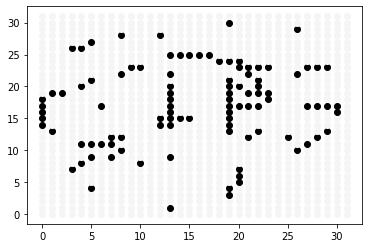

In [116]:
disp_pic(hop_net.net_out(p10))

In [117]:
hop_net.attractor_dict

{0: array([[-1, -1, -1, ..., -1, -1, -1]]),
 1: array([[-1, -1, -1, ..., -1, -1, -1]]),
 2: array([[1, 1, 1, ..., 1, 1, 1]]),
 3: array([[-1, -1, -1, ..., -1, -1, -1]])}

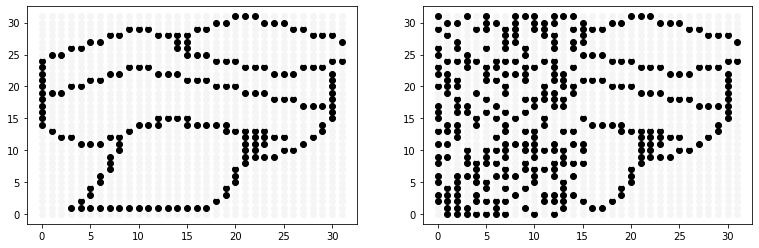

In [118]:
plt.figure(figsize = (13, 4))
plt.subplot(1, 2, 1)
disp_pic(p1)
plt.subplot(1, 2, 2)
disp_pic(p10)

In [119]:
new_pic = np.copy(hop_net.net_out(np.copy(p10)))

Stable after 3. Did not change after last iteration.


In [120]:
new_pic.shape

(1, 1024)

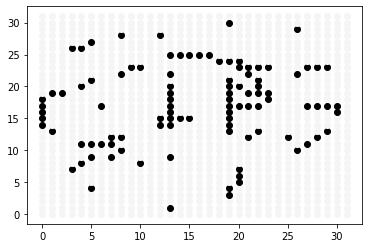

In [121]:
disp_pic(new_pic)

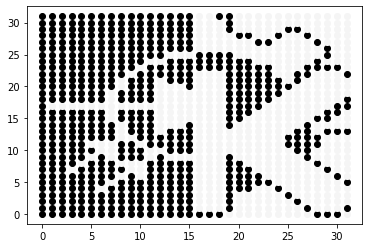

In [122]:
disp_pic(p11)

In [123]:
hop_net.pattern_dict

{0: array([[-1, -1, -1, ..., -1, -1, -1]]),
 1: array([[-1, -1, -1, ..., -1, -1, -1]]),
 2: array([[1, 1, 1, ..., 1, 1, 1]])}

In [124]:
def random_pic(number_of_pixels):
    pic = np.zeros([1, number_of_pixels])
    for i in range(number_of_pixels):
        pix = random.choice([-1,1])
        pic[0,i] = pix
    return pic
            

In [125]:
rand_pic = random_pic(1024)

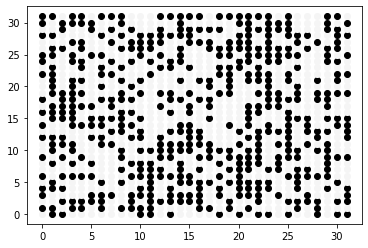

In [126]:
disp_pic(rand_pic)

Stable after 2. Did not change after last iteration.


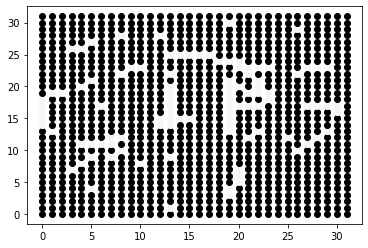

In [127]:
rand_pic = random_pic(1024)
new_pic = np.copy(hop_net.net_out(np.copy(rand_pic)))
disp_pic(new_pic)

Stable after 3. Did not change after last iteration.


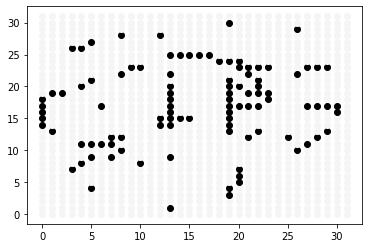

In [128]:
new_pic = np.copy(hop_net.net_out(np.copy(p10)))
disp_pic(new_pic)

In [129]:
hop_net.update_type = 'asyn'
new_pic = np.copy(hop_net.net_out(np.copy(p10)))

Reached maximum number of iterations.


In [76]:
hop_net.update_type = 'asyn'
new_pic = np.copy(hop_net.net_out(np.copy(rand_pic)))

Reached maximum number of iterations.


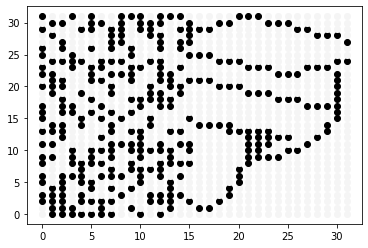

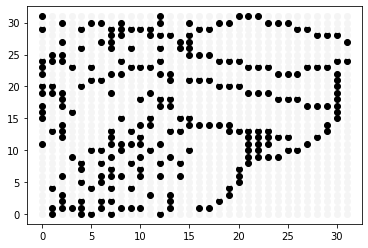

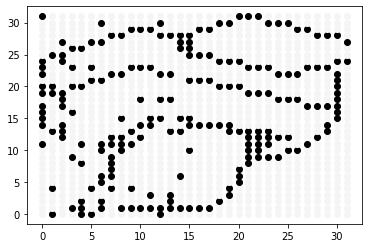

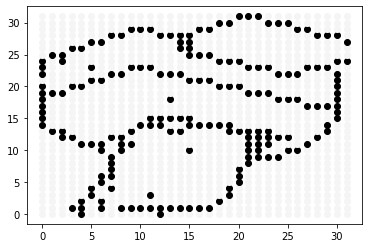

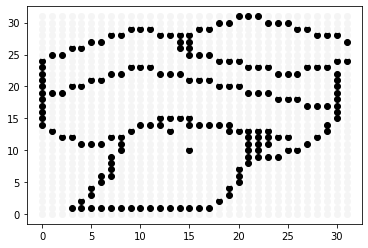

In [130]:
for pic in hop_net.store_updates:
    disp_pic(pic)
    plt.show()
disp_pic(new_pic)

# 3.3 Energy

In [131]:
X = np.concatenate((p1.T, p2.T, p3.T), axis = 1)
hop_net_energy = Hopfield_Net(X)

In [132]:
hop_net_energy.attractor_dict

{0: array([[-1, -1, -1, ..., -1, -1, -1]]),
 1: array([[-1, -1, -1, ..., -1, -1, -1]]),
 2: array([[1, 1, 1, ..., 1, 1, 1]])}

In [133]:
hop_net_energy.update_type = 'asyn'
new_pic = np.copy(hop_net_energy.net_out(np.copy(p10)))

Reached maximum number of iterations.


Energy: -422892.0


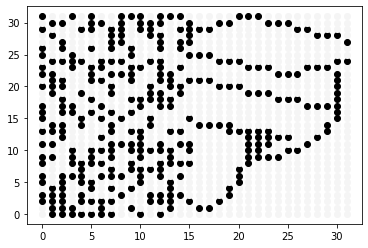

Energy: -853004.0


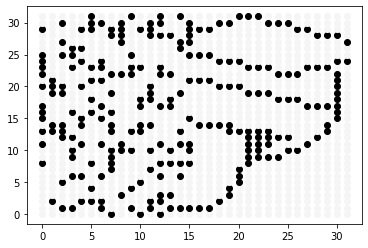

Energy: -1117580.0


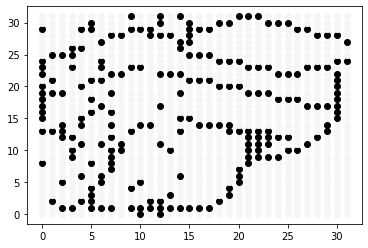

Energy: -1279404.0


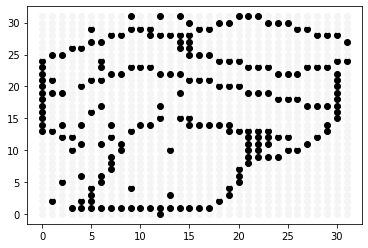

Energy: -1439564.0


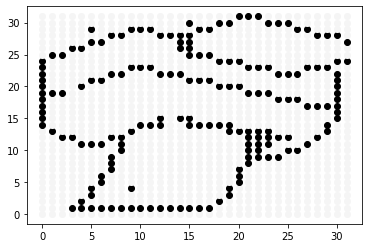

In [134]:
for pic in hop_net_energy.store_updates:
    print("Energy: {}".format(hop_net_energy.energy(pic)))
    disp_pic(pic)
    plt.show()
print("Energy: {}".format(hop_net_energy.energy(new_pic)))
disp_pic(new_pic)

4it [00:03,  1.30it/s]


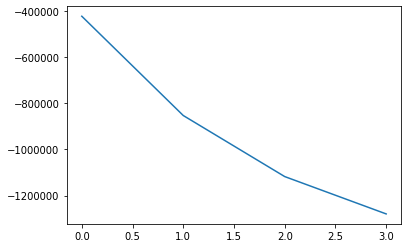

In [136]:
from tqdm import tqdm
energy_list = []
for i, update in tqdm(enumerate(hop_net_energy.store_updates)):
    energy = hop_net_energy.energy(update)
    energy_list.append(energy)
plt.plot(energy_list)

Text(0, 0.5, 'Energy')

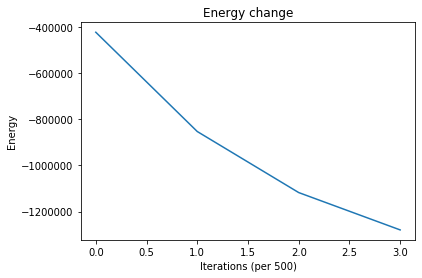

In [137]:
plt.plot(energy_list)
plt.title('Energy change')
plt.xlabel('Iterations (per 500)')
plt.ylabel('Energy')

In [138]:
hop_net_sym = Hopfield_Net(rand_pic.T)
hop_net_sym.W = 0.5*(np.copy(hop_net_sym.Wrand) + np.copy(hop_net_sym.Wrand).T)
hop_net_sym.update_type = 'syn'

hop_net_asym = Hopfield_Net(rand_pic.T)
hop_net_asym.W = np.copy(hop_net_asym.Wrand)
hop_net_asym.update_type = 'syn'

In [139]:
sym_pic = hop_net_sym.net_out(np.copy(p1))
asym_pic = hop_net_asym.net_out(np.copy(p1))

Stable after 34. Did not change after last iteration.


KeyboardInterrupt: 

In [140]:
disp_pic(asym_pic)

NameError: name 'asym_pic' is not defined

In [245]:
from tqdm import tqdm
sym_energy_list = []
for update in tqdm(hop_net_sym.store_updates):
    energy = hop_net_sym.energy(update)
    sym_energy_list.append(energy)
plt.plot(sym_energy_list)

NameError: name 'hop_net_sym' is not defined

100%|██████████| 12/12 [00:09<00:00,  1.29it/s]


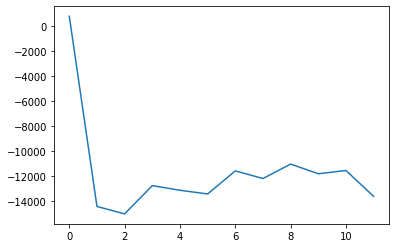

In [233]:
from tqdm import tqdm
asym_energy_list = []
for update in tqdm(hop_net_asym.store_updates):
    energy = hop_net_asym.energy(update)
    asym_energy_list.append(energy)
plt.plot(asym_energy_list)

In [116]:
hop_net_ran.W

array([[ 0.86234731, -0.22635304,  0.5592982 , ...,  0.09577395,
        -0.08965664,  0.77547875],
       [-0.53314702, -0.47765313,  0.99811089, ...,  0.9689526 ,
         1.25144206, -1.00621162],
       [ 0.10914115,  0.57758505, -0.94347043, ..., -0.55488918,
        -0.87857515, -0.8127091 ],
       ...,
       [ 0.38824628, -0.03393545, -0.08639645, ...,  0.940169  ,
         0.85657139,  0.33333062],
       [ 0.47375754, -0.73596325, -1.33336681, ...,  0.31336985,
        -1.29797385,  0.51788725],
       [-1.27910892,  0.71074184,  0.37196315, ..., -0.59693461,
        -0.40039089, -0.83565588]])

Reached maximum number of iterations.


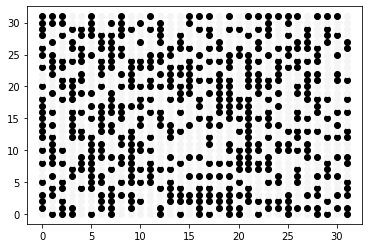

In [110]:
hop_net_ran.update_type = 'asyn'
new_pic = hop_net_ran.net_out(np.copy(p1))
disp_pic(new_pic)

# 3.4 Distortion Resistance

In [141]:
p1 = np.array([all_pics[0]])
p2 = np.array([all_pics[1]])
p3 = np.array([all_pics[2]])
X = np.concatenate((p1.T, p2.T, p3.T), axis = 1)
hop_net_dist = Hopfield_Net(X)

In [145]:
hop_net_dist.net_out(np.copy(p10))

Stable after 3. Did not change after last iteration.


array([[-1, -1, -1, ..., -1, -1, -1]])

In [146]:
def dist_pic(pic, dist_percent):
    number_of_pix = pic.shape[1]
    number_of_dist = round(dist_percent*number_of_pix)
    sample_ids = np.random.choice(list(range(number_of_pix)), number_of_dist)
    for idx in sample_ids:
        pic[0,idx] *= -1
    return pic

In [147]:
p1_dist = dist_pic(np.copy(p1), 0.2)

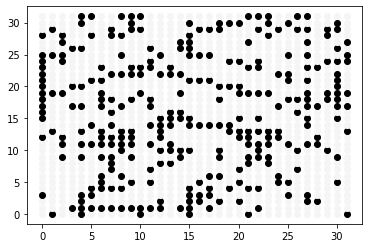

In [148]:
disp_pic(np.copy(p1_dist))

######### PIC 1 #########
### Distortion percent 0 ###
Converged to X-row 1 after 1 iterations


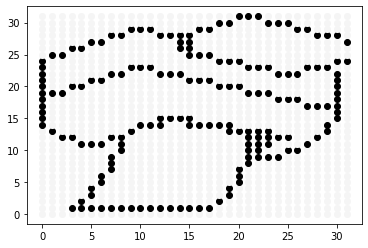

### Distortion percent 0.1 ###
Reached maximum number of iterations.


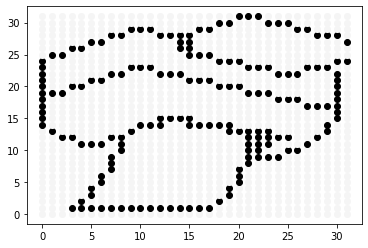

### Distortion percent 0.2 ###
Reached maximum number of iterations.


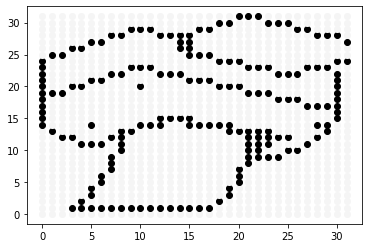

### Distortion percent 0.3 ###
Reached maximum number of iterations.


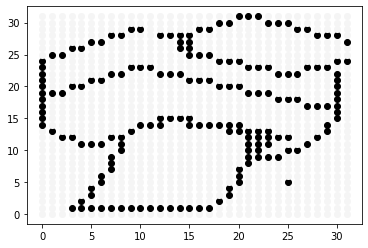

### Distortion percent 0.4 ###
Reached maximum number of iterations.


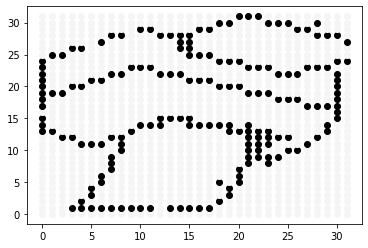

### Distortion percent 0.5 ###
Reached maximum number of iterations.


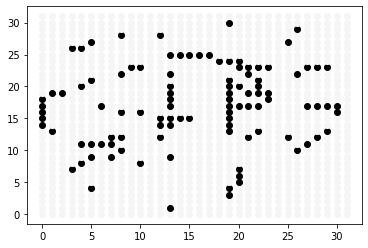

### Distortion percent 0.6 ###
Reached maximum number of iterations.


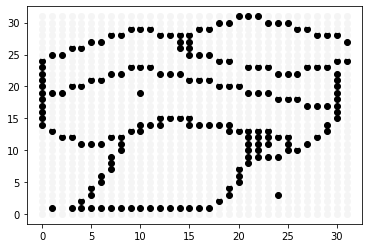

### Distortion percent 0.7 ###
Reached maximum number of iterations.


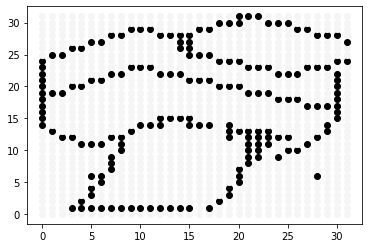

### Distortion percent 0.8 ###
Reached maximum number of iterations.


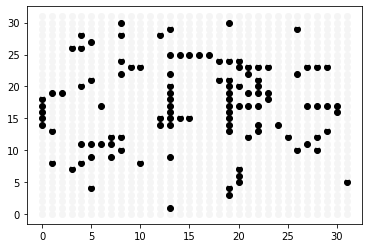

### Distortion percent 0.9 ###
Reached maximum number of iterations.


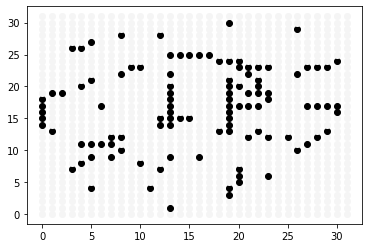

### Distortion percent 1 ###
Reached maximum number of iterations.


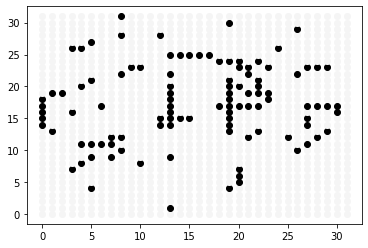

######### PIC 2 #########
### Distortion percent 0 ###
Converged to X-row 2 after 1 iterations


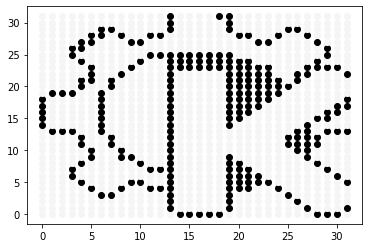

### Distortion percent 0.1 ###
Reached maximum number of iterations.


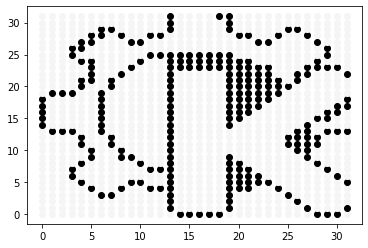

### Distortion percent 0.2 ###
Reached maximum number of iterations.


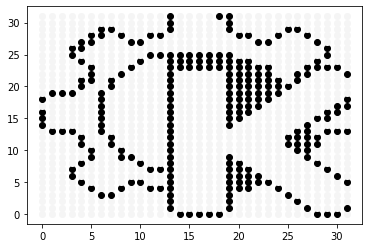

### Distortion percent 0.3 ###
Reached maximum number of iterations.


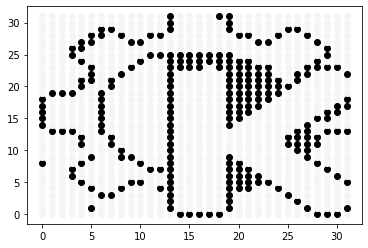

### Distortion percent 0.4 ###
Reached maximum number of iterations.


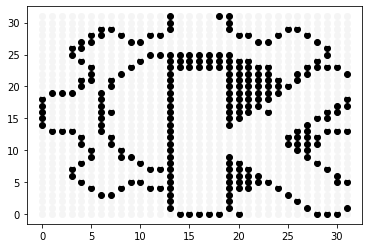

### Distortion percent 0.5 ###
Reached maximum number of iterations.


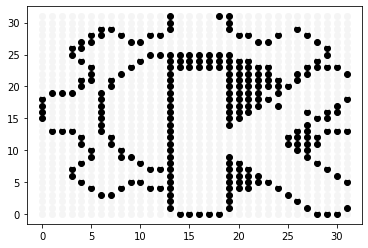

### Distortion percent 0.6 ###
Reached maximum number of iterations.


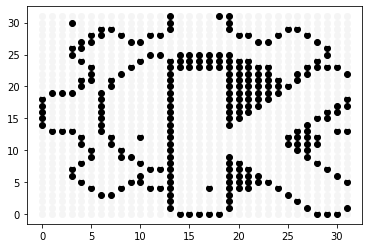

### Distortion percent 0.7 ###
Reached maximum number of iterations.


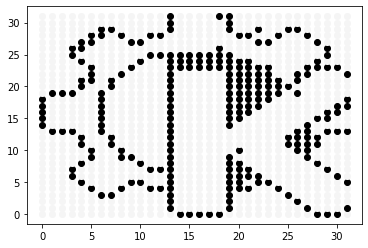

### Distortion percent 0.8 ###
Reached maximum number of iterations.


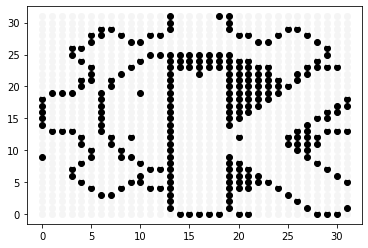

### Distortion percent 0.9 ###
Reached maximum number of iterations.


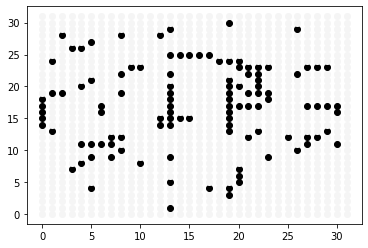

### Distortion percent 1 ###
Reached maximum number of iterations.


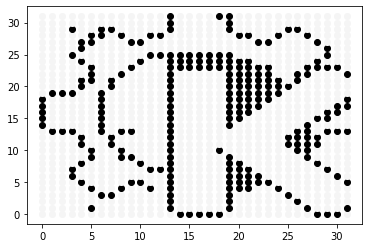

######### PIC 3 #########
### Distortion percent 0 ###
Converged to X-row 3 after 1 iterations


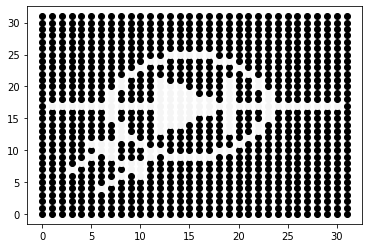

### Distortion percent 0.1 ###
Reached maximum number of iterations.


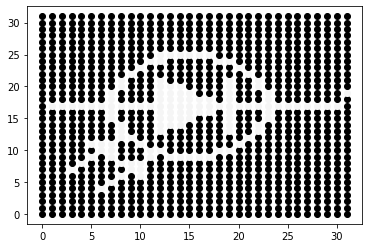

### Distortion percent 0.2 ###
Reached maximum number of iterations.


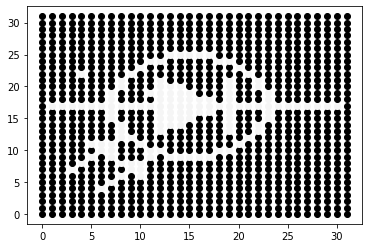

### Distortion percent 0.3 ###
Reached maximum number of iterations.


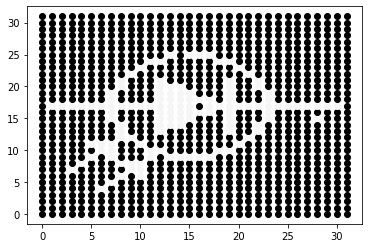

### Distortion percent 0.4 ###
Reached maximum number of iterations.


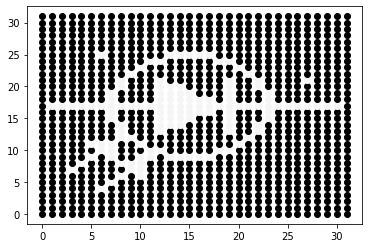

### Distortion percent 0.5 ###
Reached maximum number of iterations.


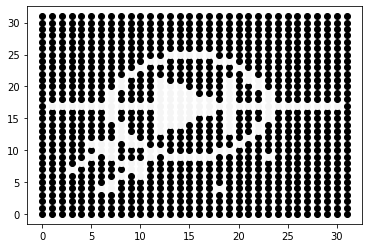

### Distortion percent 0.6 ###
Reached maximum number of iterations.


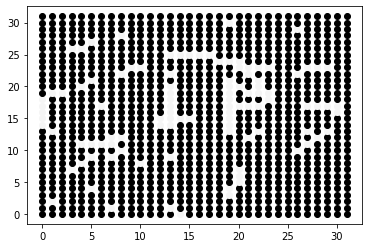

### Distortion percent 0.7 ###
Reached maximum number of iterations.


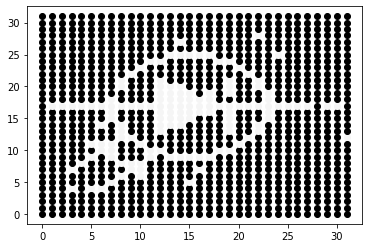

### Distortion percent 0.8 ###
Reached maximum number of iterations.


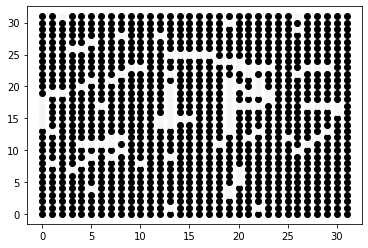

### Distortion percent 0.9 ###
Reached maximum number of iterations.


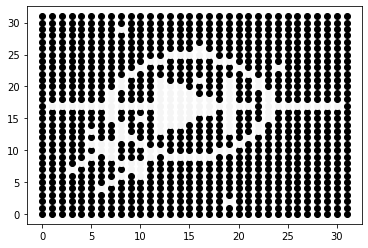

### Distortion percent 1 ###
Reached maximum number of iterations.


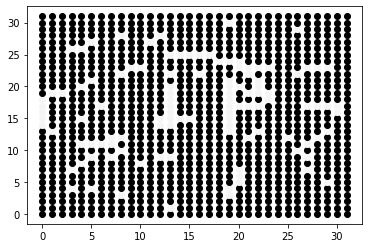

In [150]:
hop_net_dist.update_type = 'asyn'
for nr, pic in enumerate([p1, p2, p3]):
    print("######### PIC {} #########".format(nr + 1))
    for percent in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
        print("### Distortion percent {} ###".format(percent))
        pic_dist = dist_pic(np.copy(pic), percent)
        new_pic = hop_net_dist.net_out(np.copy(pic_dist))
        disp_pic(new_pic)
        plt.show()

######### PIC 0 #########
### Distortion percent 0 ###
Converged to X-row 1 after 1 iterations


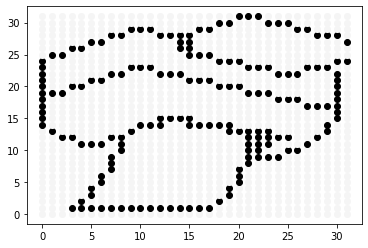

### Distortion percent 0.1 ###
Reached maximum number of iterations.


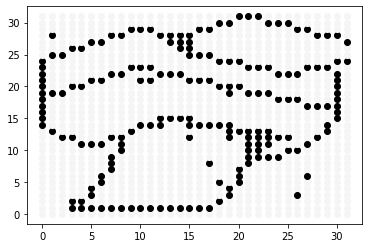

### Distortion percent 0.2 ###
Reached maximum number of iterations.


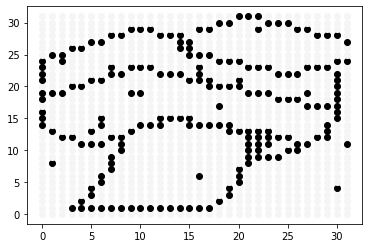

### Distortion percent 0.3 ###
Reached maximum number of iterations.


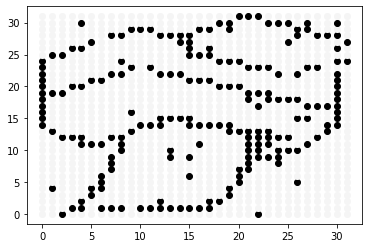

### Distortion percent 0.4 ###
Reached maximum number of iterations.


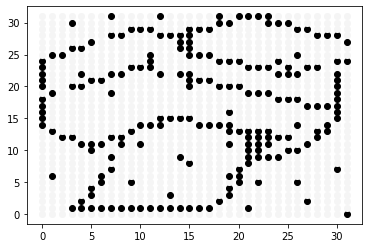

### Distortion percent 0.5 ###
Reached maximum number of iterations.


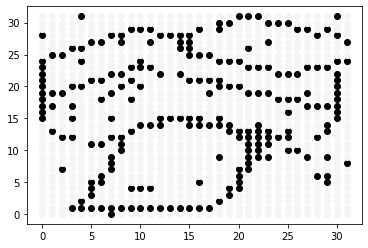

### Distortion percent 0.6 ###
Reached maximum number of iterations.


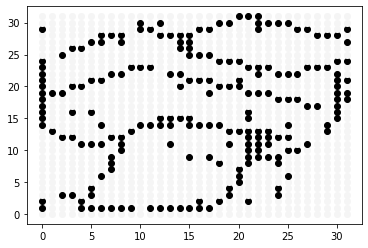

### Distortion percent 0.7 ###
Reached maximum number of iterations.


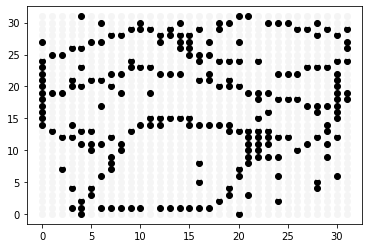

### Distortion percent 0.8 ###
Reached maximum number of iterations.


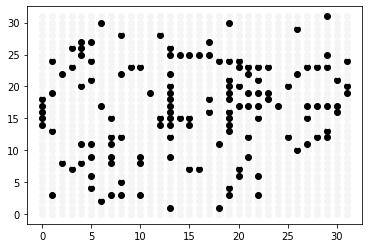

### Distortion percent 0.9 ###
Reached maximum number of iterations.


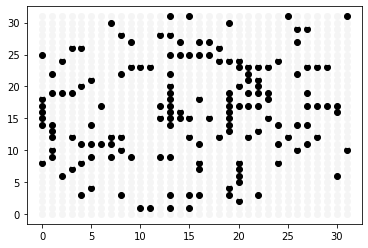

### Distortion percent 1 ###
Reached maximum number of iterations.


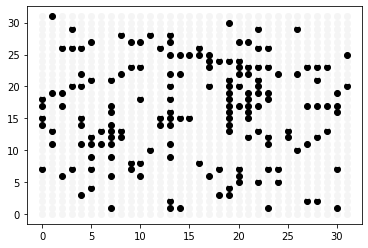

######### PIC 1 #########
### Distortion percent 0 ###
Converged to X-row 2 after 1 iterations


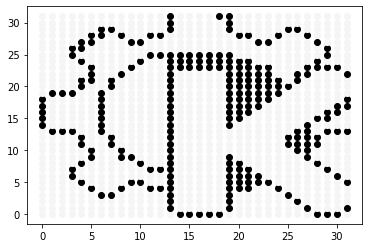

### Distortion percent 0.1 ###
Reached maximum number of iterations.


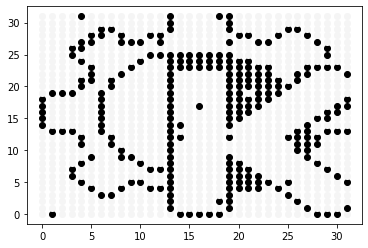

### Distortion percent 0.2 ###
Reached maximum number of iterations.


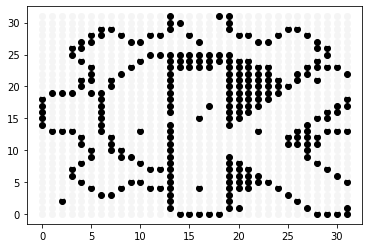

### Distortion percent 0.3 ###
Reached maximum number of iterations.


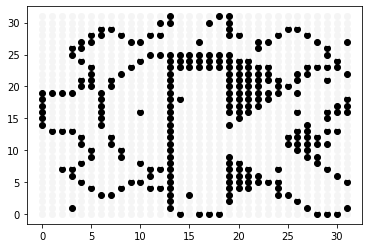

### Distortion percent 0.4 ###
Reached maximum number of iterations.


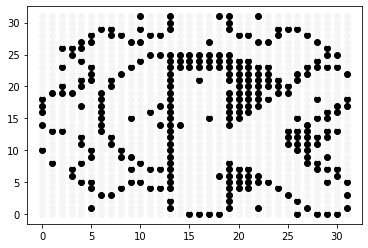

### Distortion percent 0.5 ###
Reached maximum number of iterations.


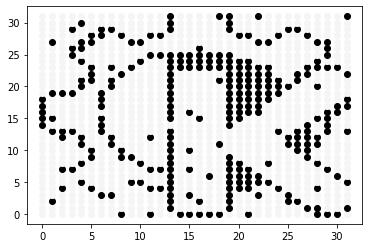

### Distortion percent 0.6 ###
Reached maximum number of iterations.


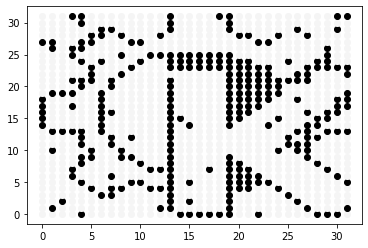

### Distortion percent 0.7 ###
Reached maximum number of iterations.


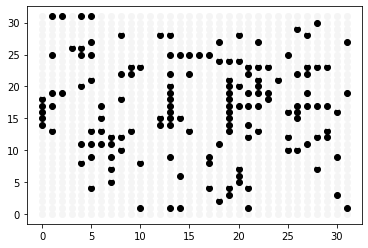

### Distortion percent 0.8 ###
Reached maximum number of iterations.


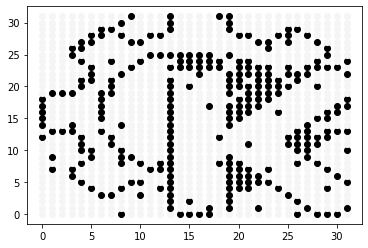

### Distortion percent 0.9 ###
Reached maximum number of iterations.


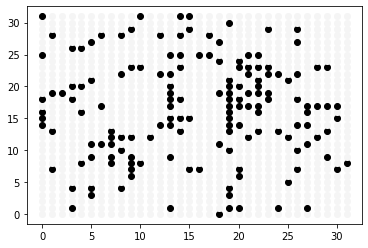

### Distortion percent 1 ###
Reached maximum number of iterations.


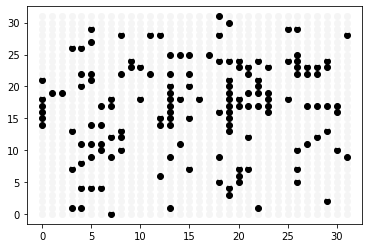

######### PIC 2 #########
### Distortion percent 0 ###
Converged to X-row 3 after 1 iterations


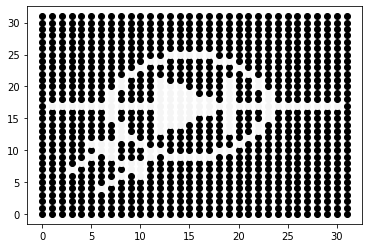

### Distortion percent 0.1 ###
Reached maximum number of iterations.


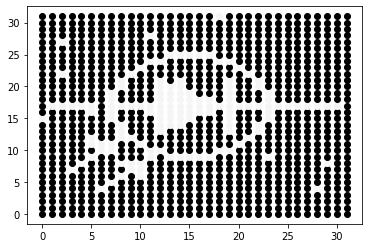

### Distortion percent 0.2 ###
Reached maximum number of iterations.


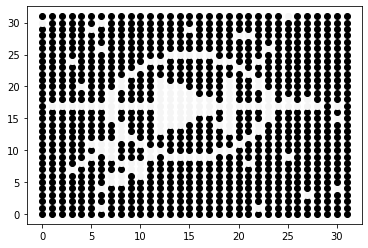

### Distortion percent 0.3 ###
Reached maximum number of iterations.


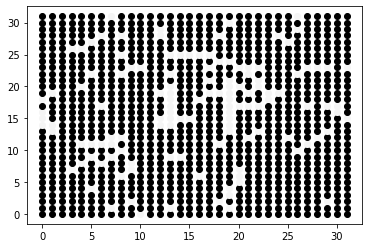

### Distortion percent 0.4 ###
Reached maximum number of iterations.


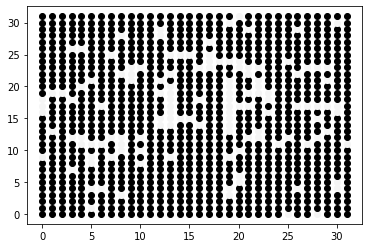

### Distortion percent 0.5 ###
Reached maximum number of iterations.


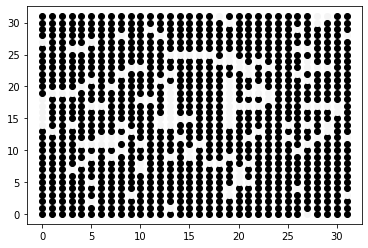

### Distortion percent 0.6 ###
Reached maximum number of iterations.


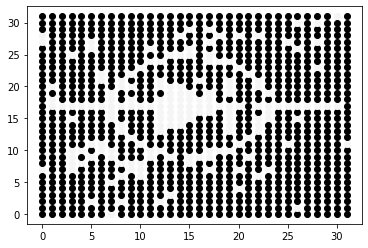

### Distortion percent 0.7 ###
Reached maximum number of iterations.


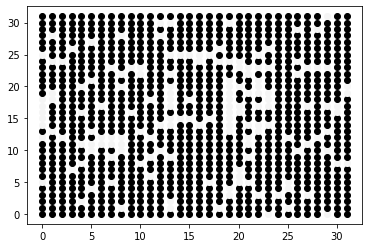

### Distortion percent 0.8 ###
Reached maximum number of iterations.


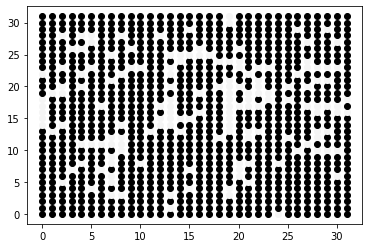

### Distortion percent 0.9 ###
Reached maximum number of iterations.


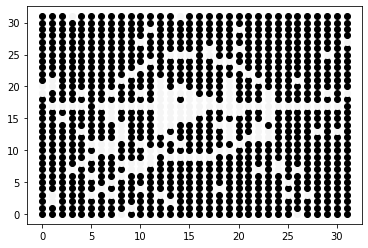

### Distortion percent 1 ###
Reached maximum number of iterations.


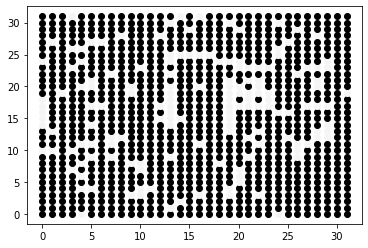

In [114]:
hop_net_dist.update_type = 'asyn'
for nr, pic in enumerate([p1, p2, p3]):
    print("######### PIC {} #########".format(nr + 1))
    for percent in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
        print("### Distortion percent {} ###".format(percent))
        pic_dist = dist_pic(np.copy(pic), percent)
        new_pic = hop_net_dist.net_out(np.copy(pic_dist))
        disp_pic(new_pic)
        plt.show()

# 3.5 Capacity

In [151]:
p1 = np.array([all_pics[0]])
p2 = np.array([all_pics[1]])
p3 = np.array([all_pics[2]])
p4 = np.array([all_pics[3]])
p5 = np.array([all_pics[4]])
p6 = np.array([all_pics[5]])
p7 = np.array([all_pics[6]])
p8 = np.array([all_pics[7]])
p9 = np.array([all_pics[8]])
p10 = np.array([all_pics[9]])
p11 = np.array([all_pics[10]])

In [155]:
p1.shape

(1, 1024)

In [152]:
X = np.concatenate((p1.T, p2.T, p3.T, p4.T, p6.T, p7.T), axis = 1)
hop_net_cap = Hopfield_Net(X)

######### PIC 1 #########
### Distortion percent 0 ###
Reached maximum number of iterations.


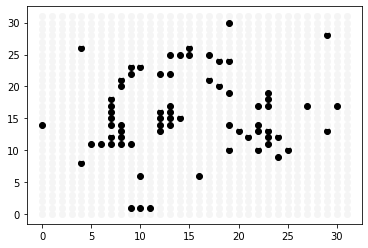

######### PIC 2 #########
### Distortion percent 0 ###
Reached maximum number of iterations.


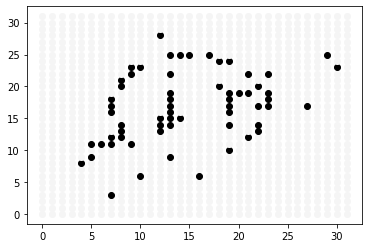

######### PIC 3 #########
### Distortion percent 0 ###
Converged to X-row 3 after 1 iterations


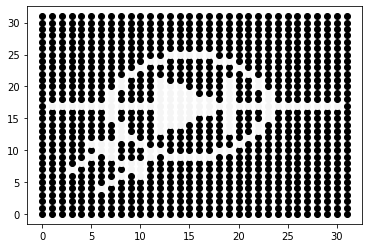

######### PIC 4 #########
### Distortion percent 0 ###
Converged to X-row 4 after 1 iterations


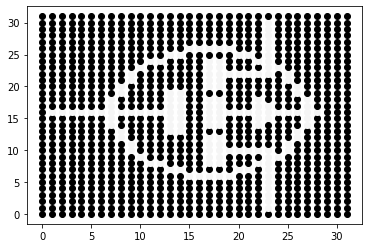

######### PIC 5 #########
### Distortion percent 0 ###
Converged to X-row 5 after 1 iterations


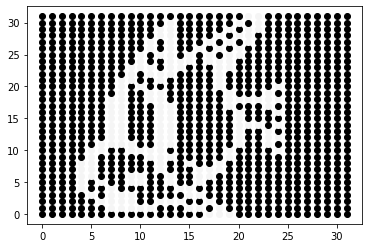

######### PIC 6 #########
### Distortion percent 0 ###
Converged to X-row 6 after 1 iterations


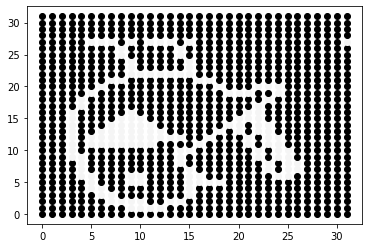

In [153]:
hop_net_cap.update_type = 'asyn'
for nr, pic in enumerate([p1, p2, p3, p4, p6, p7]):
    print("######### PIC {} #########".format(nr + 1))
    for percent in [0]:
        print("### Distortion percent {} ###".format(percent))
        pic_dist = dist_pic(np.copy(pic), percent)
        new_pic = hop_net_cap.net_out(np.copy(pic_dist))
        disp_pic(new_pic)
        plt.show()

When adding only p5, one of the pictures can't be recalled. 

When adding only p6, sometimes it works, sometimes it doesn't.

When adding only p7, sometimes it works, sometimes it doesn't.

When adding p5 and p6, two failed to recover

When adding p6 and p7, two failed to recover